# Testing basic field operators in package `ViscousFlow`

In [1]:
using ViscousFlow

In [2]:
using Plots
pyplot()
clibrary(:colorbrewer)
default(grid = false)

### Testing new field types and operators

In [3]:
i = 5; j = 5;

In [4]:
nx = 12; ny = 12;

In [5]:
w = Nodes(Dual,(5,4))
w .= reshape(1:20,5,4)
w∘w
C = Curl()
D = Divergence()
D*(C*w)

Nodes{Primal,5,4} data
Printing in grid orientation (lower left is (1,1))
3×4 Array{Float64,2}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [6]:
w = Nodes(Dual,(12,12));
w[4,4] = 1.0;
q = Edges(Primal,w)
curl!(q,w)

Edges{Primal,12,12} data
u (in grid orientation)
11×12 Array{Float64,2}:
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
v (in grid orientation)
12×11 Array{Float64,2}:
 0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0

In [7]:
q = Edges(Dual,(8,6));
p = deepcopy(q);
q.u[3,2] = 0.3;
p.u[3,2] = 0.2;
p∘q

Edges{Dual,8,6} data
u (in grid orientation)
6×7 Array{Float64,2}:
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.06  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
v (in grid orientation)
5×8 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [8]:
q = Edges{Dual, 5, 4}()
q.u .= reshape(1:16, 4, 4)
q.v .= reshape(1:15, 5, 3)
v = Edges{Primal, 5, 4}()
Fields.cellshift!(v,q)
v.v

4×4 Array{Float64,2}:
 0.0  4.0   9.0  0.0
 0.0  5.0  10.0  0.0
 0.0  6.0  11.0  0.0
 0.0  7.0  12.0  0.0

In [9]:
nx = 100; ny = 100;
i = 40; j = 50;
w = Nodes(Dual,(nx,ny))
w[i,j] = 1.0
E = plan_intfact(5,w)
E25 = plan_intfact(2.5,w)

Integrating factor with parameter 2.5 on a (nx = 100, ny = 100) grid

In [10]:
E25*(E25*w)≈E*w

true

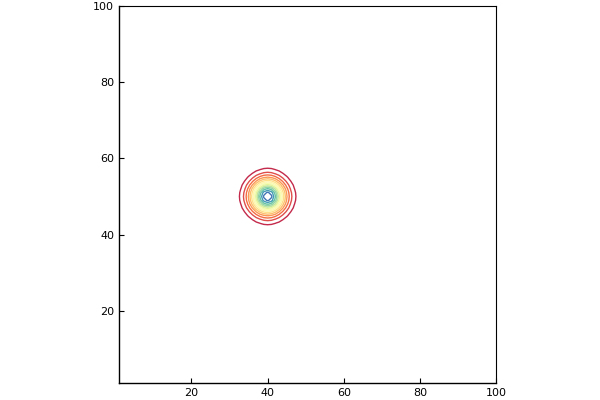

In [11]:
plot(E*w)

In [12]:
cellzero = Nodes(Dual,(nx,ny))
nodezero = Nodes(Primal,cellzero)
facezero = Edges(Primal,cellzero)
dualfacezero = Edges(Dual,cellzero)

cellunit = deepcopy(cellzero)
cellunit[i,j] = 1.0

1.0

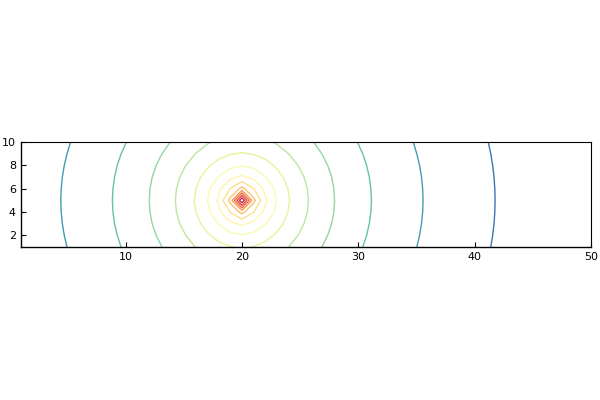

In [13]:
w = Nodes(Dual,(50,10));
w[20,5] = 1.0
L = plan_laplacian(w,with_inverse=true)
plot(L\w)

In [14]:
E = plan_intfact(1.0,(nx,ny))

Integrating factor with parameter 1.0 on a (nx = 100, ny = 100) grid

In [15]:
E! = plan_intfact!(1.0,(nx,ny))

In-place integrating factor with parameter 1.0 on a (nx = 100, ny = 100) grid

In [16]:
w = deepcopy(cellunit)

Nodes{Dual,100,100} data
Printing in grid orientation (lower left is (1,1))
100×100 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

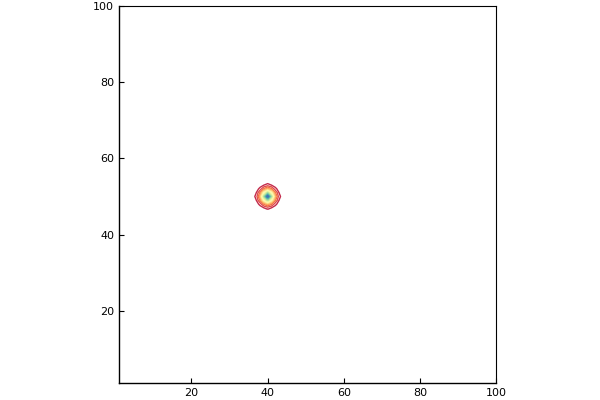

In [17]:
plot(E!*w)

In [18]:
C = Curl()
C*w

Edges{Primal,100,100} data
u (in grid orientation)
99×100 Array{Float64,2}:
 -3.0122e-19   -5.5219e-19   -7.38432e-19  …  -9.08481e-19  -7.74153e-19
 -1.3216e-19   -3.60951e-19  -2.84511e-19      9.27492e-20   2.05123e-19
 -3.13136e-19  -4.43889e-19  -4.78265e-19     -1.26123e-19  -1.85637e-19
  8.73687e-19   1.0827e-18    9.3333e-19      -4.56963e-19  -2.01649e-19
  2.72557e-19   7.23487e-20  -2.14927e-20     -1.86806e-19  -1.63471e-19
 -7.08627e-19  -4.87072e-19  -2.60778e-19  …   7.65729e-19   2.53182e-19
  4.45052e-20  -2.2228e-19   -3.68458e-19      2.25961e-19   1.72538e-19
 -2.29989e-19   2.73052e-19   6.79699e-19     -1.21087e-19   7.16193e-20
 -4.46721e-19  -3.56838e-19  -3.96994e-19     -1.05428e-19  -7.55155e-20
  9.28527e-19   1.03987e-18   8.05495e-19     -7.2181e-19   -9.77507e-19
 -1.61503e-19  -5.4288e-19   -6.15598e-19  …   2.09258e-19  -1.19416e-19
 -1.92234e-19   2.0466e-19    6.06733e-19     -5.3025e-19   -1.6516e-19 
  3.71515e-19  -9.33212e-20  -5.53559e-19      6

In [19]:
Nodes(Primal,cellunit)

Nodes{Primal,100,100} data
Printing in grid orientation (lower left is (1,1))
99×99 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [20]:
w = Fields.Nodes{Fields.Dual, 5, 4}()
w .= reshape(1:20, 5, 4)
Ww = Fields.cellshift(w)

Edges{Dual,5,4} data
u (in grid orientation)
4×4 Array{Float64,2}:
  0.0   0.0   0.0   0.0
 11.5  12.5  13.5  14.5
  6.5   7.5   8.5   9.5
  0.0   0.0   0.0   0.0
v (in grid orientation)
3×5 Array{Float64,2}:
 0.0  14.5  15.5  16.5  0.0
 0.0   9.5  10.5  11.5  0.0
 0.0   4.5   5.5   6.5  0.0

In [21]:
s = Fields.Nodes{Fields.Dual, 5, 4}()
s .= rand(5, 4)
Fields.divergence(Fields.curl(s))

Nodes{Primal,5,4} data
Printing in grid orientation (lower left is (1,1))
3×4 Array{Float64,2}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [22]:
v = Fields.Nodes(Fields.Dual,(12,12))
v[4,5] = 1.0
v

Nodes{Dual,12,12} data
Printing in grid orientation (lower left is (1,1))
12×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [23]:
L = plan_laplacian(nx,ny;with_inverse=true)

Discrete Laplacian (and inverse) on a (nx = 100, ny = 100) grid with spacing 1.0

In [24]:
faceones = deepcopy(facezero)
fill!(faceones,1.0)

Edges{Primal,100,100} data
u (in grid orientation)
99×100 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.

In [25]:
L*(L\cellunit)

Nodes{Dual,100,100} data
Printing in grid orientation (lower left is (1,1))
100×100 Array{Float64,2}:
 0.0   0.0           0.0          …   0.0           0.0          0.0
 0.0  -1.11022e-16  -2.22045e-16     -5.55112e-16  -4.44089e-16  0.0
 0.0  -8.88178e-16  -3.33067e-16     -9.99201e-16   1.11022e-15  0.0
 0.0   9.99201e-16   5.55112e-16      0.0          -5.55112e-16  0.0
 0.0  -1.44329e-15  -1.33227e-15      1.22125e-15  -4.44089e-16  0.0
 0.0   2.44249e-15   1.66533e-15  …  -2.22045e-16   1.44329e-15  0.0
 0.0  -1.9984e-15   -1.88738e-15      6.66134e-16  -1.66533e-15  0.0
 0.0   1.11022e-16  -3.33067e-16     -6.66134e-16  -1.11022e-16  0.0
 0.0   1.88738e-15   9.99201e-16      1.11022e-15   1.66533e-15  0.0
 0.0  -1.33227e-15   7.77156e-16     -1.11022e-15  -4.44089e-16  0.0
 0.0  -1.11022e-16  -5.55112e-16  …  -9.99201e-16   2.22045e-16  0.0
 0.0   2.22045e-16   3.33067e-16     -7.77156e-16   1.44329e-15  0.0
 0.0   0.0           4.44089e-16      5.55112e-16  -1.33227e-15  0.0
 

In [26]:
w = Fields.Nodes(Fields.Primal,v)
w[4,5] = 1.0
Fields.grad(w)

Edges{Primal,12,12} data
u (in grid orientation)
11×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
v (in grid orientation)
12×11 Array{Float64,2}:
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0

In [27]:
q = Fields.Edges(Fields.Dual,v)
q.u[4,5] = 1.0
dq = Fields.grad(q)
dq.dudy

Nodes{Primal,12,12} data
Printing in grid orientation (lower left is (1,1))
11×11 Array{Float64,2}:
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0